Name: Jawad Al Rahwanji
MatrikelNummer: 7038980
Email: mhal00002@stud.uni-saarland.de
   
Name: Christian Singer
MatrikelNummer: 7039059
Email: chsi00002@stud.uni-saarland.de

# 3.3 Model Capacity, Underfitting and Overfitting (2.5 points)
Given training dataset $D = \{x_i,y_i\}_{i=1}^n$ where $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$ the ordinary linear least square regression minimizes the cost function
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2$
But sometimes this leads to overfitting or ill posed problems hence we add a regularizational term to the objective function. This is called ridge regression.
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2 + \lambda \sum_{i=1}^d w_i^2$
In practice we artificially add another dimension of 1's to $X$ to absorb the offset term b such that the objective function in matrix vector form becomes
$f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ where
    $
        X = \begin{bmatrix}
    X_{1,1} & \cdots & X_{1,d} & 1\\
    X_{2,1}  & \cdots & X_{2,d} & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    X_{n,1} & \cdots & X_{n,d} & 1
    \end{bmatrix}
    $
 and $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.random.seed(42)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12920\2916309156.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 3.3a (0.5 + 0.5 point)
Implement the fit() function in the ridge_regression class which takes three parameters X, Y and LAMBDA. The fit() function computes the minimizer $w^*$ as derived in 3.2 for the regularized mean squared error objective function. Store the value of $w^*$ in self.w
Implement the predict() function that takes a matrix X and returns the predictions of the model on X and since the bias term is absorbed in $w$, please do not forget to add another dimension of 1's to X as described earlier in both the fit() and predict() functions. Assume that fit() is called before using predict(). 
**Use only basic matrix vector operations from numpy**

In [2]:

class ridge_regression:
    def __init__(self):
        self.w = None # self.w.shape = (d+1,)
    
    def fit(self, X, y, lam = 0.1):
        """
        args: X.shape = (n, d). We account for the bias parameter b in the 
                design matrix X by artificially adding another dimension
                Y.shape = (n, 1)
        returns: None
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = np.linalg.inv(X.T.dot(X) + lam * np.identity(X.shape[1])).dot(X.T).dot(y)
    
    def predict(self, X):
        """
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return X.dot(self.w)

## 3.3b (0.5 + 0.5 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 samples which is randomly split into 70 training samples and 30 test samples. In this exercise we assume $x_i \in \mathbb{R}^1$  
1. Use a scatter plot to visualize your training (X_train, y_train) and test data (X_test, y_test). Train your ridge regression model on the training data (X_train, y_train) and visualize the regression model for different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] using a line graph in the same plot. You can do this by using np.linspace and the predict function of your classifier. Use appropriate legend labels. 
2. For different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] find the mean squared error between the predicted values of test dataset X_test and true labels of the test set. Plot a graph with **log scaled** $\lambda$ values on X-axis and mean squared error on Y-axis. You may use sklearn.metrics.mean_squared_error()

How does changing the values of $\lambda$ affect the error of the model?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a dummy regression dataset with noise
X , y = make_regression(n_samples = 100, n_features = 1, noise = 10)
print(X.shape, y.shape)

# Split the dataset into 70 training samples and 30 test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Different regularization coefficient values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Use the log scaled values of lambda for plotting
log_scale = [-3, -2, -1, 0, 1, 2, 3]

(100, 1) (100,)
(70, 1) (70,) (30, 1) (30,)


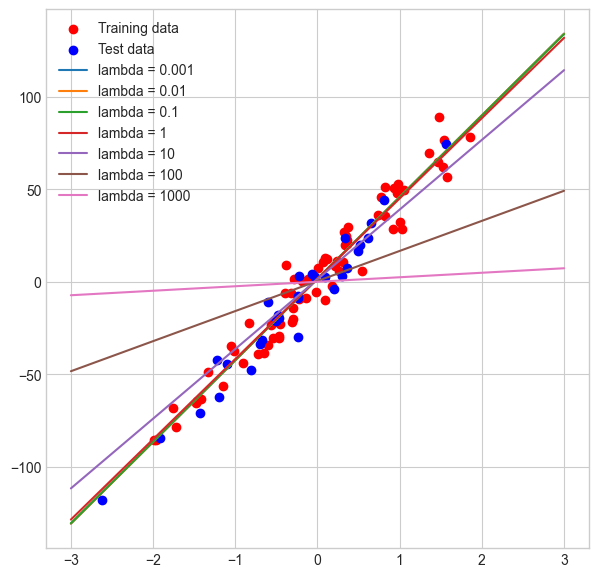

In [4]:
# Make figure bigger.
plt.figure(figsize=(7,7))
# Scatter plots of the training and test data
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter(X_test, y_test, color = 'blue', label = 'Test data')

# Fit a ridge regression model for each value of lambda and plot the learned model.
for lam in lambda_values:
    model = ridge_regression()
    model.fit(X_train, y_train, lam)
    # Plot regression line
    X = np.linspace(-3, 3, 100).reshape(-1,1)
    plt.plot(X, model.predict(X), label = 'lambda = {}'.format(lam))

plt.legend()
plt.show()

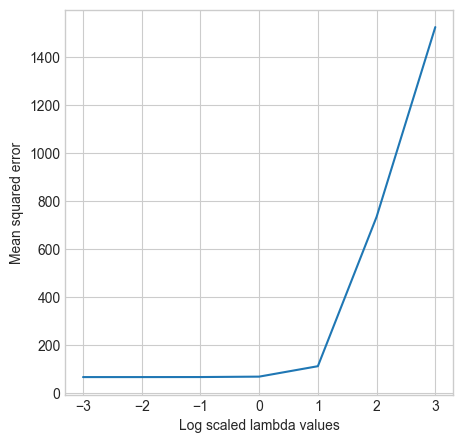

In [5]:
# Make figure bigger.
plt.figure(figsize=(5,5))

# Plot MSE for different lambda values
mse = []
for lam in lambda_values:
    model = ridge_regression()
    model.fit(X_train, y_train, lam)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(log_scale, mse)
plt.xlabel('Log scaled lambda values')
plt.ylabel('Mean squared error')
plt.show()

Very high values of lambda lead to a deterioration of the MSE.

## 3.3c (0.25 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 training samples and in this exercise we will plot the weights of the model against different values of $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]. For this exercise we take the training samples $x_i \in \mathbb{R}^{10}$ i.e. d = 10. Since the bias term is absorbed in the parameter $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$ the dimension of $w$ is $d+1$. Therefore we will only consider the first $d$ values (d=10) of self.w  
  
Train the ridge regression model on the training set (X_train, y_train) for different values of $\lambda$.
Plot a graph with **log scaled** lambda values on X-axis and each $w_i$ on the Y-axis on the same plot. Explain what happens to the weight values and model capacity as you increase the regularization coefficient.

In [6]:
from sklearn.model_selection import train_test_split
X_train , y_train = make_regression(n_samples = 100, n_features = 10, noise = 10)
print(X_train.shape, y_train.shape)

(100, 10) (100,)


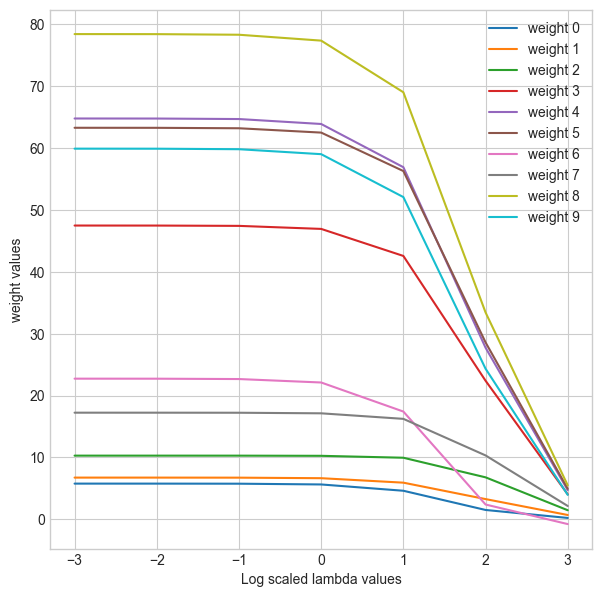

In [7]:
# Make figure bigger.
plt.figure(figsize=(7,7))

weights = []
for lam in lambda_values:
    model = ridge_regression()
    model.fit(X_train, y_train, lam)
    weights.append(model.w[:-1])

weights = np.stack(weights)

# Column i contains w_i for different lambda values.
for i in range(0, weights.shape[1]):
    plt.plot(log_scale, weights[:,i], label=f"weight {i}")

plt.xlabel('Log scaled lambda values')
plt.ylabel('weight values')
plt.legend()
plt.show()

Increasing $\lambda$ leads to a decrease in the size of $w_i$, this decreases the capacity since the range of the size of the weights is related to the set of functions the model can approximate.

## 3.3d (0.25 point)
Answer the following questions  
1. Do you observe overfitting or underfitting for different values of λ in this exercise?

Once the model weights start to decrease to zero, we are experiencing underfitting since the model capacity collapses.